In [3]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding= 'ISO-8859-1')

In [5]:
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
col_names = ['target' , 'id' , 'date' , 'flag' , 'user' , 'text']
dataset.columns = col_names

In [7]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
dataset.shape

(1599999, 6)

In [9]:
#checking for missing values
dataset.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [10]:
# Distribution of tweets
dataset['target'].value_counts()

,count
target,
4,800000
0,799999


In [11]:
# Converting 0 to -ve and 4 to +ve
dataset['target'] = dataset['target'].map({0:0 , 4:1})

In [12]:
dataset['target'].value_counts()

,count
target,
1,800000
0,799999


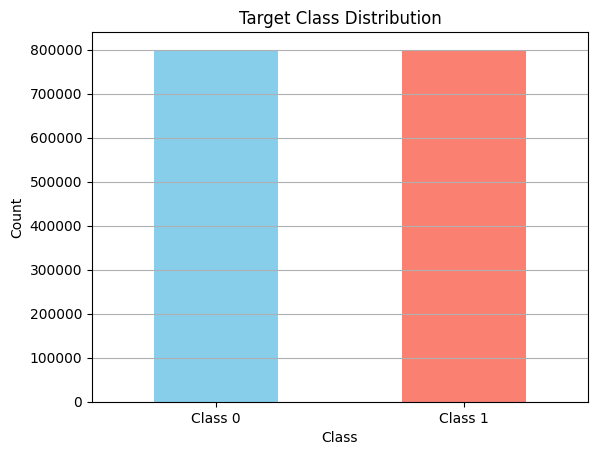

In [13]:
# Plot class distribution
dataset['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Class 0", "Class 1"], rotation=0)
plt.grid(axis='y')
plt.show()

In [14]:
import re
import string
import html
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are available
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_text(text):
    # 1. Remove HTML tags using regex
    text = re.sub(r'<.*?>', '', text)

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Convert emojis to UTF-8-safe demojized form
    text = emoji.demojize(text, language='en')
    text = text.encode('utf-8', 'ignore').decode('utf-8')

    # 6. Convert to lowercase
    text = text.lower()

    # 7. Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]

    return ' '.join(filtered_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
dataset['text']=dataset['text'].apply(clean_text)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
# Pass the cleaned text (which are strings) directly to TfidfVectorizer
# TfidfVectorizer will handle its own tokenization internally
X = tfidf.fit_transform(dataset['text'])
y = dataset['target']

In [17]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11236685 stored elements and shape (1599999, 443449)>

In [18]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1599994,1
1599995,1
1599996,1
1599997,1


Cross-Validation Accuracy Scores: [0.78241797 0.78332813 0.78382812 0.78343359 0.78224915]
Mean CV Accuracy: 0.7830513923821479

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           1       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



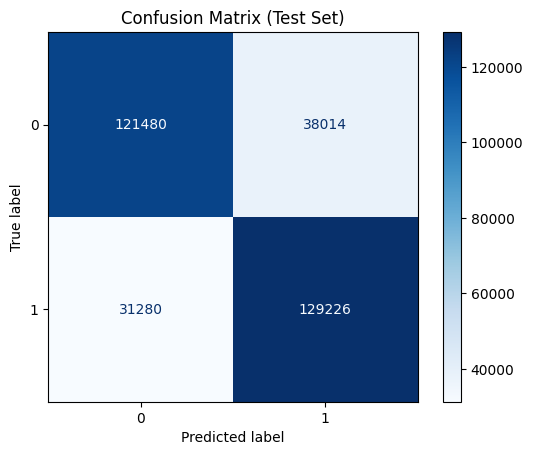

In [19]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Split data for final test evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
clf = LogisticRegression(max_iter=1000)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores (accuracy by default)
cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Train final model on full training set
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluation on test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot it
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy Scores: [0.73901953 0.73787109 0.74131641 0.73998828 0.73896773]
Mean CV Accuracy: 0.7394326085685393


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:55:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.72    159494
           1       0.71      0.83      0.76    160506

    accuracy                           0.74    320000
   macro avg       0.75      0.74      0.74    320000
weighted avg       0.75      0.74      0.74    320000



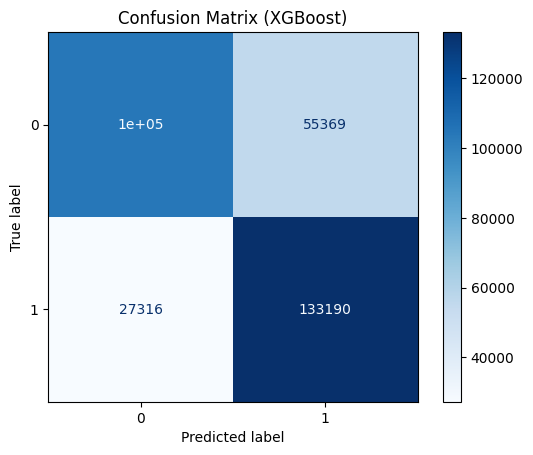

In [20]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split data for final test evaluation
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
clf1 = XGBClassifier(n_estimators=20, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Setup K-Fold cross-validation
kf1 = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores1 = cross_val_score(clf1, X_train1, y_train1, cv=kf1, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores1)
print("Mean CV Accuracy:", np.mean(cv_scores1))

# Train final model on full training set
clf1.fit(X_train1, y_train1)

# Predict on test set
y_pred1 = clf1.predict(X_test1)

# Evaluation on test set
print("\nTest Set Classification Report:")
print(classification_report(y_test1, y_pred1))

# Confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf1.classes_)

# Plot it
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy Scores: [0.76425    0.76571484 0.76584766 0.76492187 0.76455767]
Mean CV Accuracy: 0.7650584098106828


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76    159494
           1       0.76      0.77      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



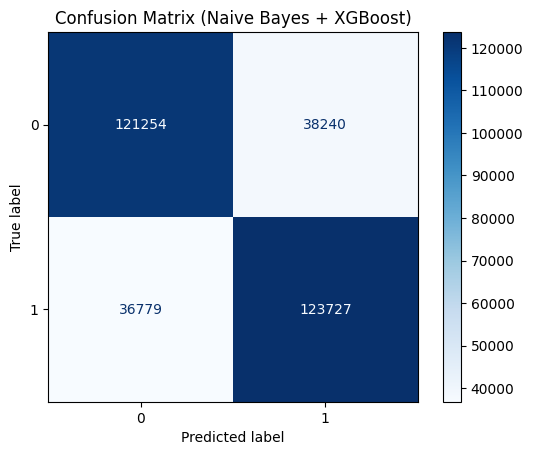

In [19]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model
nb_model = MultinomialNB()

# Final estimator
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fusion model: Naive Bayes + XGBoost
clf3 = StackingClassifier(estimators=[('nb', nb_model)], final_estimator=xgb_model, cv=5)

# Setup K-Fold cross-validation
kf3 = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores3 = cross_val_score(clf3, X_train3, y_train3, cv=kf3, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores3)
print("Mean CV Accuracy:", np.mean(cv_scores3))

# Train final fusion model
clf3.fit(X_train3, y_train3)

# Predict on test set
y_pred3 = clf3.predict(X_test3)

# Evaluation on test set
print("\nTest Set Classification Report:")
print(classification_report(y_test3, y_pred3))

# Confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf3.classes_)

# Plot it
disp3.plot(cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes + XGBoost)")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:25:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy Scores: [0.76425    0.76571484 0.76584766 0.76492187 0.76455767]
Mean CV Accuracy: 0.7650584098106828


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76    159494
           1       0.76      0.77      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



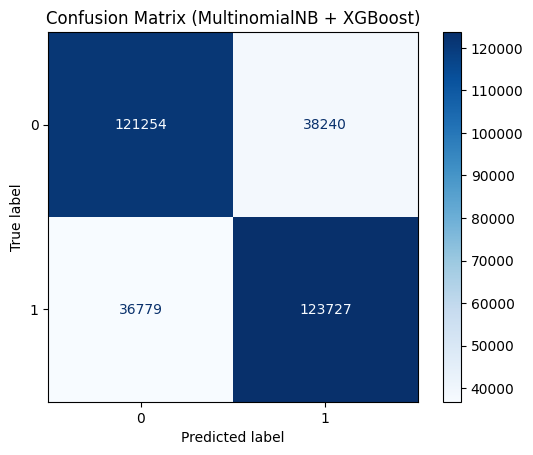

In [20]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split your data
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Base classifier
nb_model = MultinomialNB()

# Final classifier
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Create Stacking model: Naive Bayes + XGBoost
clf4 = StackingClassifier(
    estimators=[('nb', nb_model)],
    final_estimator=xgb_model,
    cv=5
)

# Setup K-Fold CV
kf4 = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
cv_scores4 = cross_val_score(clf4, X_train4, y_train4, cv=kf4, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores4)
print("Mean CV Accuracy:", np.mean(cv_scores4))

# Train fusion model
clf4.fit(X_train4, y_train4)

# Predict on test data
y_pred4 = clf4.predict(X_test4)

# Evaluation
print("\nTest Set Classification Report:")
print(classification_report(y_test4, y_pred4))

# Confusion matrix
cm4 = confusion_matrix(y_test4, y_pred4)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=np.unique(y))  # Or clf4.classes_

# Plot
disp4.plot(cmap='Blues')
plt.title("Confusion Matrix (MultinomialNB + XGBoost)")
plt.show()
